# Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

from sklearn.preprocessing import MinMaxScaler

## step1

# Read Dataset

In [2]:
df = pd.read_csv('dataframe_.csv')

# step2 

# EDA

In [3]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
df.tail()

,input,output
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052
1696,17.145296,-101.726894


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [6]:
df.dtypes

input     float64
output    float64
dtype: object

In [7]:
print('No. of rows:',df.shape[0])
print('No. of columns:',df.shape[1])

No. of rows: 1697
No. of columns: 2


In [8]:
print('Size of the dataframe:',df.size)

Size of the dataframe: 3394


In [9]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [10]:
df.columns

Index(['input', 'output'], dtype='object')

In [11]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

input     0
output    0
dtype: int64

# visualization

<AxesSubplot:xlabel='input', ylabel='output'>

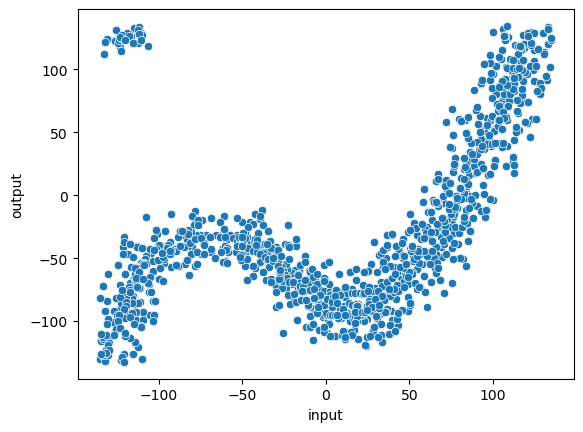

In [14]:
sns.scatterplot(data=df, x="input", y="output")

<AxesSubplot:>

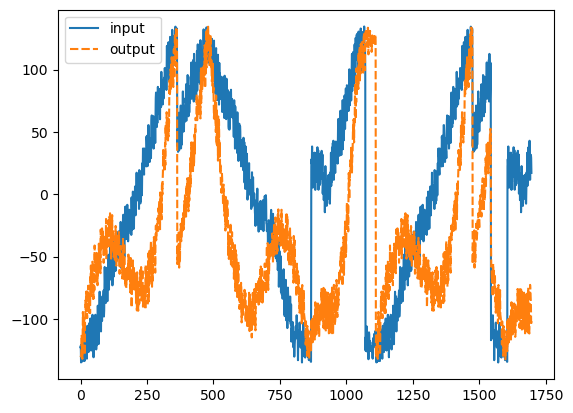

In [15]:
sns.lineplot(data=df)

# Split dataset 

In [16]:
x = df['input'].values.reshape((-1,1))
y = df['output'].values.reshape((-1,1))

##### the values for our response variable are continuous.

In [17]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

# Step 3 Build Logistic Regression Model

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y_transformed, test_size = 0.2, random_state = 42)

In [19]:
print('Shape of x_train:',x_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of x_train:',x_test.shape)
print('Shape of y_train:',y_test.shape)

Shape of x_train: (1356, 1)
Shape of y_train: (1356,)
Shape of x_train: (340, 1)
Shape of y_train: (340,)


In [20]:
lor = LogisticRegression(penalty='l2',C=10.0)
lor.fit(x_train,y_train)

LogisticRegression(C=10.0)

In [21]:
y_pred = lor.predict(x_test)
y_pred

array([230, 582, 582, 837, 837, 837, 230, 230, 582, 582, 230, 837, 837,
       230, 582, 230, 960, 583, 837, 837, 582, 960, 230, 583, 582, 230,
       960, 582, 837, 230, 960, 230, 230, 960, 230, 230, 837, 582, 837,
       230, 230, 960, 230, 960, 230, 230, 230, 960, 230, 583, 583, 230,
       960, 837, 230, 230, 230, 230, 230, 960, 230, 230, 230, 837, 230,
       960, 230, 960, 230, 837, 230, 837, 837, 583, 230, 583, 230, 837,
       837, 230, 230, 960, 837, 230, 582, 960, 230, 960, 837, 582, 582,
       230, 582, 230, 960, 837, 960, 837, 230, 230, 230, 230, 230, 230,
       230, 837, 230, 230, 960, 837, 230, 837, 960, 837, 230, 582, 230,
       230, 230, 583, 230, 960, 837, 960, 837, 960, 960, 837, 837, 230,
       960, 960, 230, 960, 230, 230, 230, 837, 583, 582, 230, 230, 230,
       230, 230, 582, 837, 837, 960, 230, 230, 583, 837, 230, 837, 582,
       230, 230, 837, 582, 583, 837, 230, 837, 230, 960, 960, 837, 837,
       837, 230, 837, 837, 837, 230, 230, 230, 582, 583, 582, 23

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# Printing Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='micro'))
print("Recall:", recall_score(y_test, y_pred,average='micro'))
a = accuracy_score(y_test, y_pred)

Accuracy: 0.01764705882352941
Precision: 0.01764705882352941
Recall: 0.01764705882352941


### step 4

## Proper outlier detection and treatment

In [23]:
a = df.loc[df['input'] >= -100][:]

In [24]:
frames = [a]
df_new = pd.concat(frames)

In [25]:
df_new.to_csv("finaldata.csv")

## Read the final dataset

In [65]:
df2= pd.read_csv('finaldata.csv')

## plot

<AxesSubplot:xlabel='input', ylabel='output'>

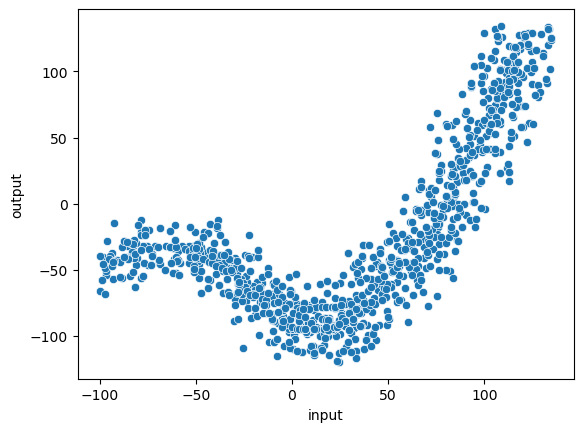

In [66]:
sns.scatterplot(data=df2, x="input", y="output")

## Feature Engineering and Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [ ]:
mm = MinMaxScaler()
# Normalizing X_train
mm_X_train = mm.fit_transform(x_train)
# Scaling X_test
mm_X_test = mm. transform(x_test)
classifier = GradientBoostingClassifier()
parameter = {'n_estimators': [50], 'learning_rate': [0.1]}
mm_lor = GridSearchCV(estimator=classifier, param_grid=parameter,cv=5, n_jobs=-1)
# Performing fit on scaled_X_train and y_train
mm_lor.fit(mm_X_train, y_train)
# Prediction on scaled_X_test
mm_y_pred = mm_lor.predict(mm_X_test)
print("Predictions of scaled data using MinMaxScaler:\n", mm_y_pred)

In [ ]:
print(" Accuracy:", accuracy_score(y_test, mm_y_pred))
print(" Precision:", precision_score(y_test, mm_y_pred,average='micro'))
print(" Recall:", recall_score(y_test, mm_y_pred,average='micro'))
b = print(" Accuracy:", accuracy_score(y_test, mm_y_pred)

## Step 5:

In [27]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='micro'))
print("Recall:", recall_score(y_test, y_pred,average='micro'))
c =accuracy_score(y_test, y_pred)

Accuracy: 0.04411764705882353
Precision: 0.04411764705882353
Recall: 0.04411764705882353


In [29]:
# initialize list of lists
m = [['logistic regressiong', 0.01764705882352941], ['GradientBoostingClassifier',0.07764705882352941 ], ['SVC',0.04411764705882353]]
  
# Create the pandas DataFrame
m = pd.DataFrame(m, columns=['model', 'accuracy'])
  
# print dataframe.
m

,model,accuracy
0,logistic regressiong,0.017647
1,GradientBoostingClassifier,0.077647
2,SVC,0.044118


### Answer

## Hyperparameter Tuned model shows the best accuracy result, when compared to other two models. This because of the gridsearch method

### step 6 Linear regression 

In [33]:
import sklearn.metrics as metrics
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
# Printing the Results
print("Results of Errors:")
print(" MSE:", mse)
print(" R-Squared:", r2)
print('\n')
print("Values of Model Parameters:")
print(" Coefficient", lr.coef_)
print(" Intercept:", lr.intercept_)

Results of Errors:
 MSE: 64620.94535430326
 R-Squared: 0.16079455618713523


Values of Model Parameters:
 Coefficient [1.78618809]
 Intercept: 446.9593760635914


# Linear Regression with Scaling using StandardScaler

In [37]:
# Creating object for Standard Scaler
ss = StandardScaler()
# Normalizing X_train
ss_X_train = ss.fit_transform(x_train)
# Scaling X_test
ss_X_test = ss.transform(x_test)

ss_lr = LinearRegression()
# Performing fit on scaled_X_train and y_train
ss_lr.fit(ss_X_train, y_train)

ss_y_pred = ss_lr.predict(ss_X_test)
print("Predictions of scaled data:\n")
for i in ss_y_pred:
    print(i)

Predictions of scaled data:

500.33293898980435
356.04263512219984
386.22075981750737
657.0746315607062
584.8480748191224
643.6815535463912
433.40804051977426
467.48869514931
324.8272922579665
324.32742591307283
476.6696343487587
669.7468549677704
616.3342688330912
499.95824504465685
397.89147361700924
416.78654707659854
209.16362730533146
280.40325255635435
608.7464388300368
641.806255746452
397.4959185846639
228.38948967092992
404.0990418480106
287.33369668077415
397.4959185846639
500.3300463475
219.45854921489294
394.46029308467917
605.2751769156915
566.89742866469
244.56084554601614
560.601206667329
430.183557067841
244.62295755760573
555.2619103618844
558.1545844067525
586.8589619784464
393.71714868982394
627.1533485489733
544.1902771177636
512.3885067509352
224.81711348851513
552.194589579387
226.6033015797225
444.51723632955293
502.1984004484059
552.6417444598582
226.59404841093482
464.1547573759474
278.5055174832599
273.04419195111495
491.51976573706315
213.34396243392985
651.7